In [82]:
import gym
import random 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

%matplotlib inline

In [133]:
# using the Bellman equation, we find the action providing the highest value for the given state s. 
# V is the list of values of all states
def choose_best_action(env, V, s, gamma):
    a_best = None
    q_best = float('-inf')
    nb_actions = env.action_space.n
    for a in range (0, nb_actions):
        if 's' in dir(env):
            env.s = s
        elif 's' in dir(env.env):
            env.env.s = s # go to state s
        s_next, r, done, info = env.step(a) #take the action a
        q = r + gamma * V[s_next] # compute the value future value after taking action a
        if q > q_best:
            q_best = q
            a_best = a
    return a_best

In [285]:
# value iteration algorithm
def compute_value_iteration(env = gym.make('FrozenLake8x8-v0'), 
                            gamma=.9, v_delta_threshold=.01,
                            V = None, verbose=True):
    env.reset()
    nb_actions = env.action_space.n
    nb_states = env.observation_space.n
    # values vector
    if V == None:
        V = np.zeros([nb_states])
    # policy vector
    P = np.zeros([nb_states], dtype=int)
    iteration = 0
    R = [] #capture rewards
    V_D = [] #capture mean deltas
    T = [] #capture execution time
    
    while True:

        v_delta = 0
        reward = 0
        
        start = time.time()
        for s in range (0, nb_states):
            v_previous = V[s]
            a_best = choose_best_action(env, V, s, gamma) # find an action with the highest future reward
            if 's' in dir(env):
                env.s = s
            elif 's' in dir(env.env):
                env.env.s = s # go to the state s
            s_next, r, done, info = env.step(a_best) #take the best action
            reward += r
            V[s] = r + gamma * V[s_next] # update the value of the state
            P[s] = a_best # store the best action in the policy vector for the state
            v_delta = max(v_delta, np.abs(v_previous - V[s])) # calculate the rate of value improvment for the state

        iteration += 1
        R.append(reward)
        V_D.append(v_delta)
        end = time.time()
        T.append(end - start)
        if v_delta < v_delta_threshold:
            break
    return V, P, iteration, R, V_D, T

# function for performing policy iteration
def compute_policy_iteration(env = gym.make('FrozenLake8x8NotSlippery-v0'), 
                            gamma=.9, v_delta_threshold=.01,
                            P = None, verbose=True):
    env.reset()
    nb_actions = env.action_space.n
    nb_states = env.observation_space.n
    # values vector
    V = np.zeros([nb_states])
    # policy vector
    if P == None:
        P = np.random.choice(nb_actions, size=nb_states)
        
    max_iterations = 200000
    iteration = 0
    R = [] #capture rewards
    V_D = [] #capture mean deltas
    T = [] #capture execution time
    for i in range(max_iterations):
        
        
        # policy evaluation
        while True:
            start = time.time()
            v_delta = 0
            reward = 0
            
            for s in range (0, nb_states):
                v_previous = V[s]  
                if 's' in dir(env):
                    env.s = s
                elif 's' in dir(env.env):
                    env.env.s = s # go to state s
                s_next, r, done, info = env.step(P[s]) #take the action recommended by policy
                reward += r
                V[s] = r + gamma * V[s_next] # update value after applying policy
                v_delta = max(v_delta, np.abs(v_previous - V[s])) # calculate the rate of value improvment for the state
            
            if v_delta < v_delta_threshold:
                break
                
            R.append(reward)
            V_D.append(v_delta)
            end = time.time()
            T.append(end - start)

        # policy improvement
        policy_stable = True
        for s in range (0, nb_states):
            a_old = P[s] # ask policy for action to perform
            a_best = choose_best_action(env, V, s, gamma) # find an action with the highest future reward    
            P[s] = a_best # store the best action in the policy vector for the state
            if a_old != a_best:
                policy_stable = False
        
        if policy_stable:
            break
        
        iteration += 1
   
    return V, P, iteration, R, V_D, T
    
value, policy, iterations, reward, delta, times = compute_policy_iteration()

In [286]:
#value, policy, iterations, reward, delta, times
v_v_lake, p_v_lake, i_v_lake, r_v_lake, d_v_lake, t_v_lake= compute_value_iteration(env = gym.make('FrozenLake8x8-v0', is_slippery = False))
v_v_cliff, p_v_cliff, i_v_cliff, r_v_cliff, d_v_cliff, t_v_cliff = compute_value_iteration(env = gym.make('Taxi-v3'))

v_p_lake, p_p_lake, i_p_lake, r_p_lake, d_p_lake, t_p_lake= compute_policy_iteration(env = gym.make('FrozenLake8x8-v0', is_slippery = False))
v_p_cliff, p_p_cliff, i_p_cliff, r_p_cliff, d_p_cliff, t_p_cliff = compute_policy_iteration(env = gym.make('Taxi-v3'))

In [279]:
lake = gym.make('FrozenLake8x8-v0')
taxi = gym.make('Taxi-v3')

In [280]:
lake.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [281]:
taxi.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



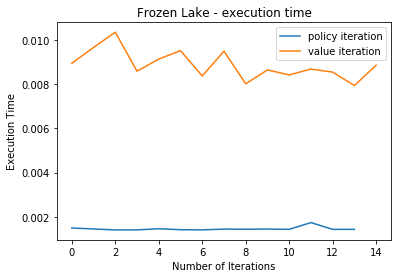

In [289]:
#plt.figure(figsize=(8,5))
#plt.plot(range(0, len(t_p_lake)), t_p_lake, marker='o', c='green', label='policy iteration')
#plt.plot(range(0, len(t_v_lake)), t_v_lake, marker='+', c='orange', label='value iteration')
plt.plot(range(0, len(t_p_lake)), t_p_lake, label='policy iteration')
plt.plot(range(0, len(t_v_lake)), t_v_lake, label='value iteration')
plt.legend(loc="best")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time')
plt.title('Frozen Lake - execution time')
plt.show()

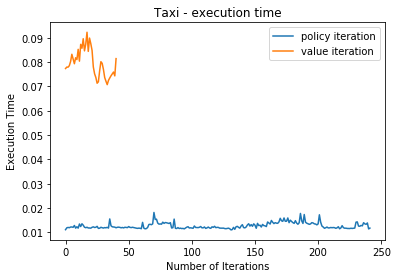

In [290]:

plt.plot(range(0, len(t_p_cliff)), t_p_cliff, label='policy iteration')
plt.plot(range(0, len(t_v_cliff)), t_v_cliff, label='value iteration')
plt.legend(loc="best")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time')
plt.title('Taxi - execution time')
plt.show()

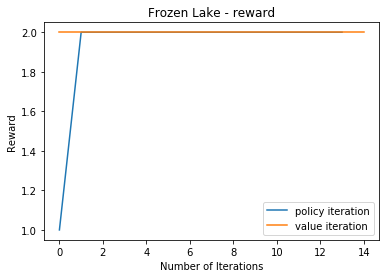

In [291]:

plt.plot(range(0, len(r_p_lake)), r_p_lake, label='policy iteration')
plt.plot(range(0, len(r_v_lake)), r_v_lake, label='value iteration')
plt.legend(loc="best")
plt.xlabel('Number of Iterations')
plt.ylabel('Reward')
plt.title('Frozen Lake - reward')
plt.show()

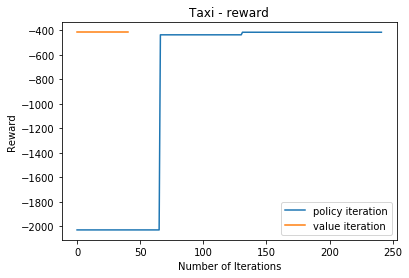

In [292]:

plt.plot(range(0, len(r_p_cliff)), r_p_cliff, label='policy iteration')
plt.plot(range(0, len(r_v_cliff)), r_v_cliff, label='value iteration')
plt.legend(loc="best")
plt.xlabel('Number of Iterations')
plt.ylabel('Reward')
plt.title('Taxi - reward')
plt.show()

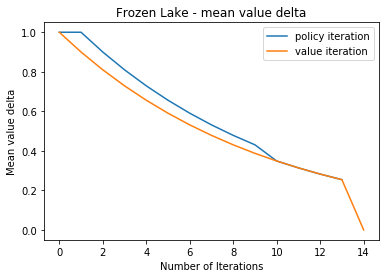

In [293]:

plt.plot(range(0, len(d_p_lake)), d_p_lake, label='policy iteration')
plt.plot(range(0, len(d_v_lake)), d_v_lake, label='value iteration')
plt.legend(loc="best")
plt.xlabel('Number of Iterations')
plt.ylabel('Mean value delta')
plt.title('Frozen Lake - mean value delta')
plt.show()

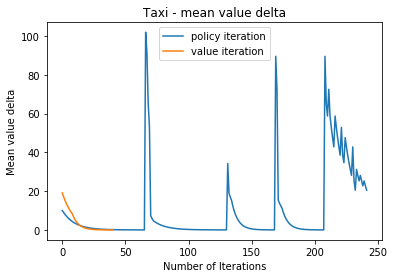

In [294]:
plt.plot(range(0, len(d_p_cliff)), d_p_cliff, label='policy iteration')
plt.plot(range(0, len(d_v_cliff)), d_v_cliff, label='value iteration')
plt.legend(loc="best")
plt.xlabel('Number of Iterations')
plt.ylabel('Mean value delta')
plt.title('Taxi - mean value delta')
plt.show()

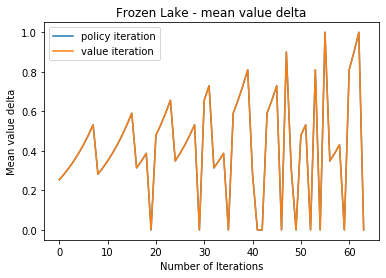

In [295]:

plt.plot(range(0, len(v_p_lake)), v_p_lake, label='policy iteration')
plt.plot(range(0, len(v_v_lake)), v_v_lake, label='value iteration')
plt.legend(loc="best")
plt.xlabel('Number of Iterations')
plt.ylabel('Mean value delta')
plt.title('Frozen Lake - mean value delta')
plt.show()

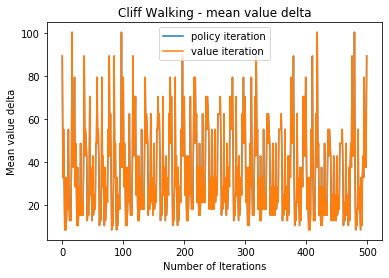

In [296]:

plt.plot(range(0, len(v_p_cliff)), v_p_cliff, label='policy iteration')
plt.plot(range(0, len(v_v_cliff)), v_v_cliff, label='value iteration')
plt.legend(loc="best")
plt.xlabel('Number of Iterations')
plt.ylabel('Mean value delta')
plt.title('Cliff Walking - mean value delta')
plt.show()

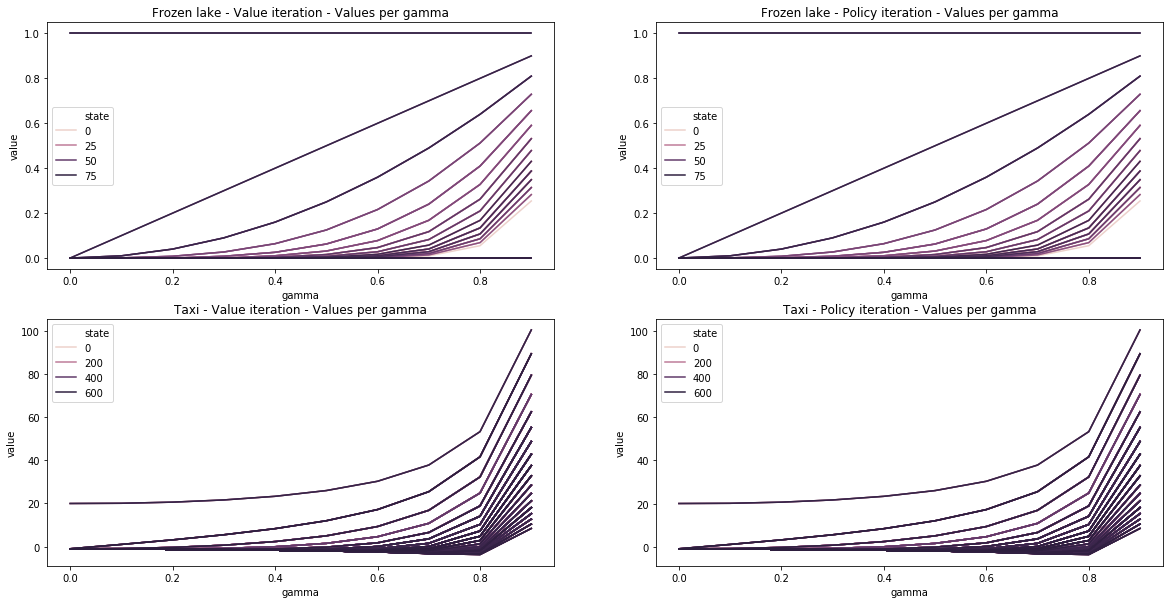

In [298]:
# function for performing value and policy iterations for given gamma
def gammas_training(method='value_iteration', 
                    gammas = np.arange(0, 1, 0.1),
                    env=gym.make('FrozenLake8x8NotSlippery-v0')):
    df_states = pd.DataFrame(columns=['gamma','state','value'])
    df_episodes = pd.DataFrame(columns=['reward', 'mean_delta', 'time'])
    
    for gamma in gammas:
        if method == 'value_iteration':
            V, P, _, R, D, T = compute_value_iteration(env=env, gamma=gamma, verbose=False)
        else:
            V, P, _, R, D, T = compute_policy_iteration(env=env, gamma=gamma, verbose=False)
        df_states = df_states.append(pd.DataFrame({'gamma':[gamma for i in range(0,env.observation_space.n)],
                                'state':[i for i in range(0,env.observation_space.n)],
                                'value': V}))
        #df_episodes = df_episodes.append(pd.DataFrame({
        #                        'reward': R,
        #                        'mean_delta': D,
        #                        'time': T}))
        df = df_states
    df.state=df.state.astype(int)
    return df
    
    
# display the values for multiple gammas

fig, ax = plt.subplots(2,2, figsize=(20,10))

df_4_v = gammas_training(method='value_iteration', env=gym.make('FrozenLake8x8-v0', is_slippery=False))
sns.lineplot(data=df_4_v, x='gamma', y='value', hue='state', ax=ax[0][0])
ax[0][0].set_title('Frozen lake - Value iteration - Values per gamma')

df_4_i = gammas_training(method='policy_iteration', env=gym.make('FrozenLake8x8-v0', is_slippery=False))
sns.lineplot(data=df_4_i, x='gamma', y='value', hue='state', ax=ax[0][1])
ax[0][1].set_title('Frozen lake - Policy iteration - Values per gamma')

df_8_v = gammas_training(method='value_iteration', env=gym.make('Taxi-v3'))
sns.lineplot(data=df_8_v, x='gamma', y='value', hue='state', ax=ax[1][0])
ax[1][0].set_title('Taxi - Value iteration - Values per gamma')

df_8_i = gammas_training(method='policy_iteration', env=gym.make('Taxi-v3'))
sns.lineplot(data=df_8_i, x='gamma', y='value', hue='state', ax=ax[1][1])
ax[1][1].set_title('Taxi - Policy iteration - Values per gamma');